#Importing the dataset

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Untitled spreadsheet - cancer_reg.csv")#reading the csv file

In [ ]:
print(df)

      avgAnnCount  avgDeathsPerYear  ...  PctMarriedHouseholds  BirthRate
0     1397.000000               469  ...             52.856076   6.118831
1      173.000000                70  ...             45.372500   4.333096
2      102.000000                50  ...             54.444868   3.729488
3      427.000000               202  ...             51.021514   4.603841
4       57.000000                26  ...             54.027460   6.796657
...           ...               ...  ...                   ...        ...
3042  1962.667684                15  ...             51.063830   7.773512
3043  1962.667684                43  ...             52.007937   8.186470
3044  1962.667684                46  ...             55.153949   7.809192
3045  1962.667684                52  ...             58.484232   7.582938
3046  1962.667684                48  ...             56.040242   8.981723

[3047 rows x 34 columns]


##describing the dataset for properties 

In [ ]:
df.shape
df.describe()#describe th dataset

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,2.479662,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,0.429174,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,2.370000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,2.500000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,2.630000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,3.970000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [ ]:
df.isnull().sum()#finding all the null values

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

##finding the correlation between values of dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


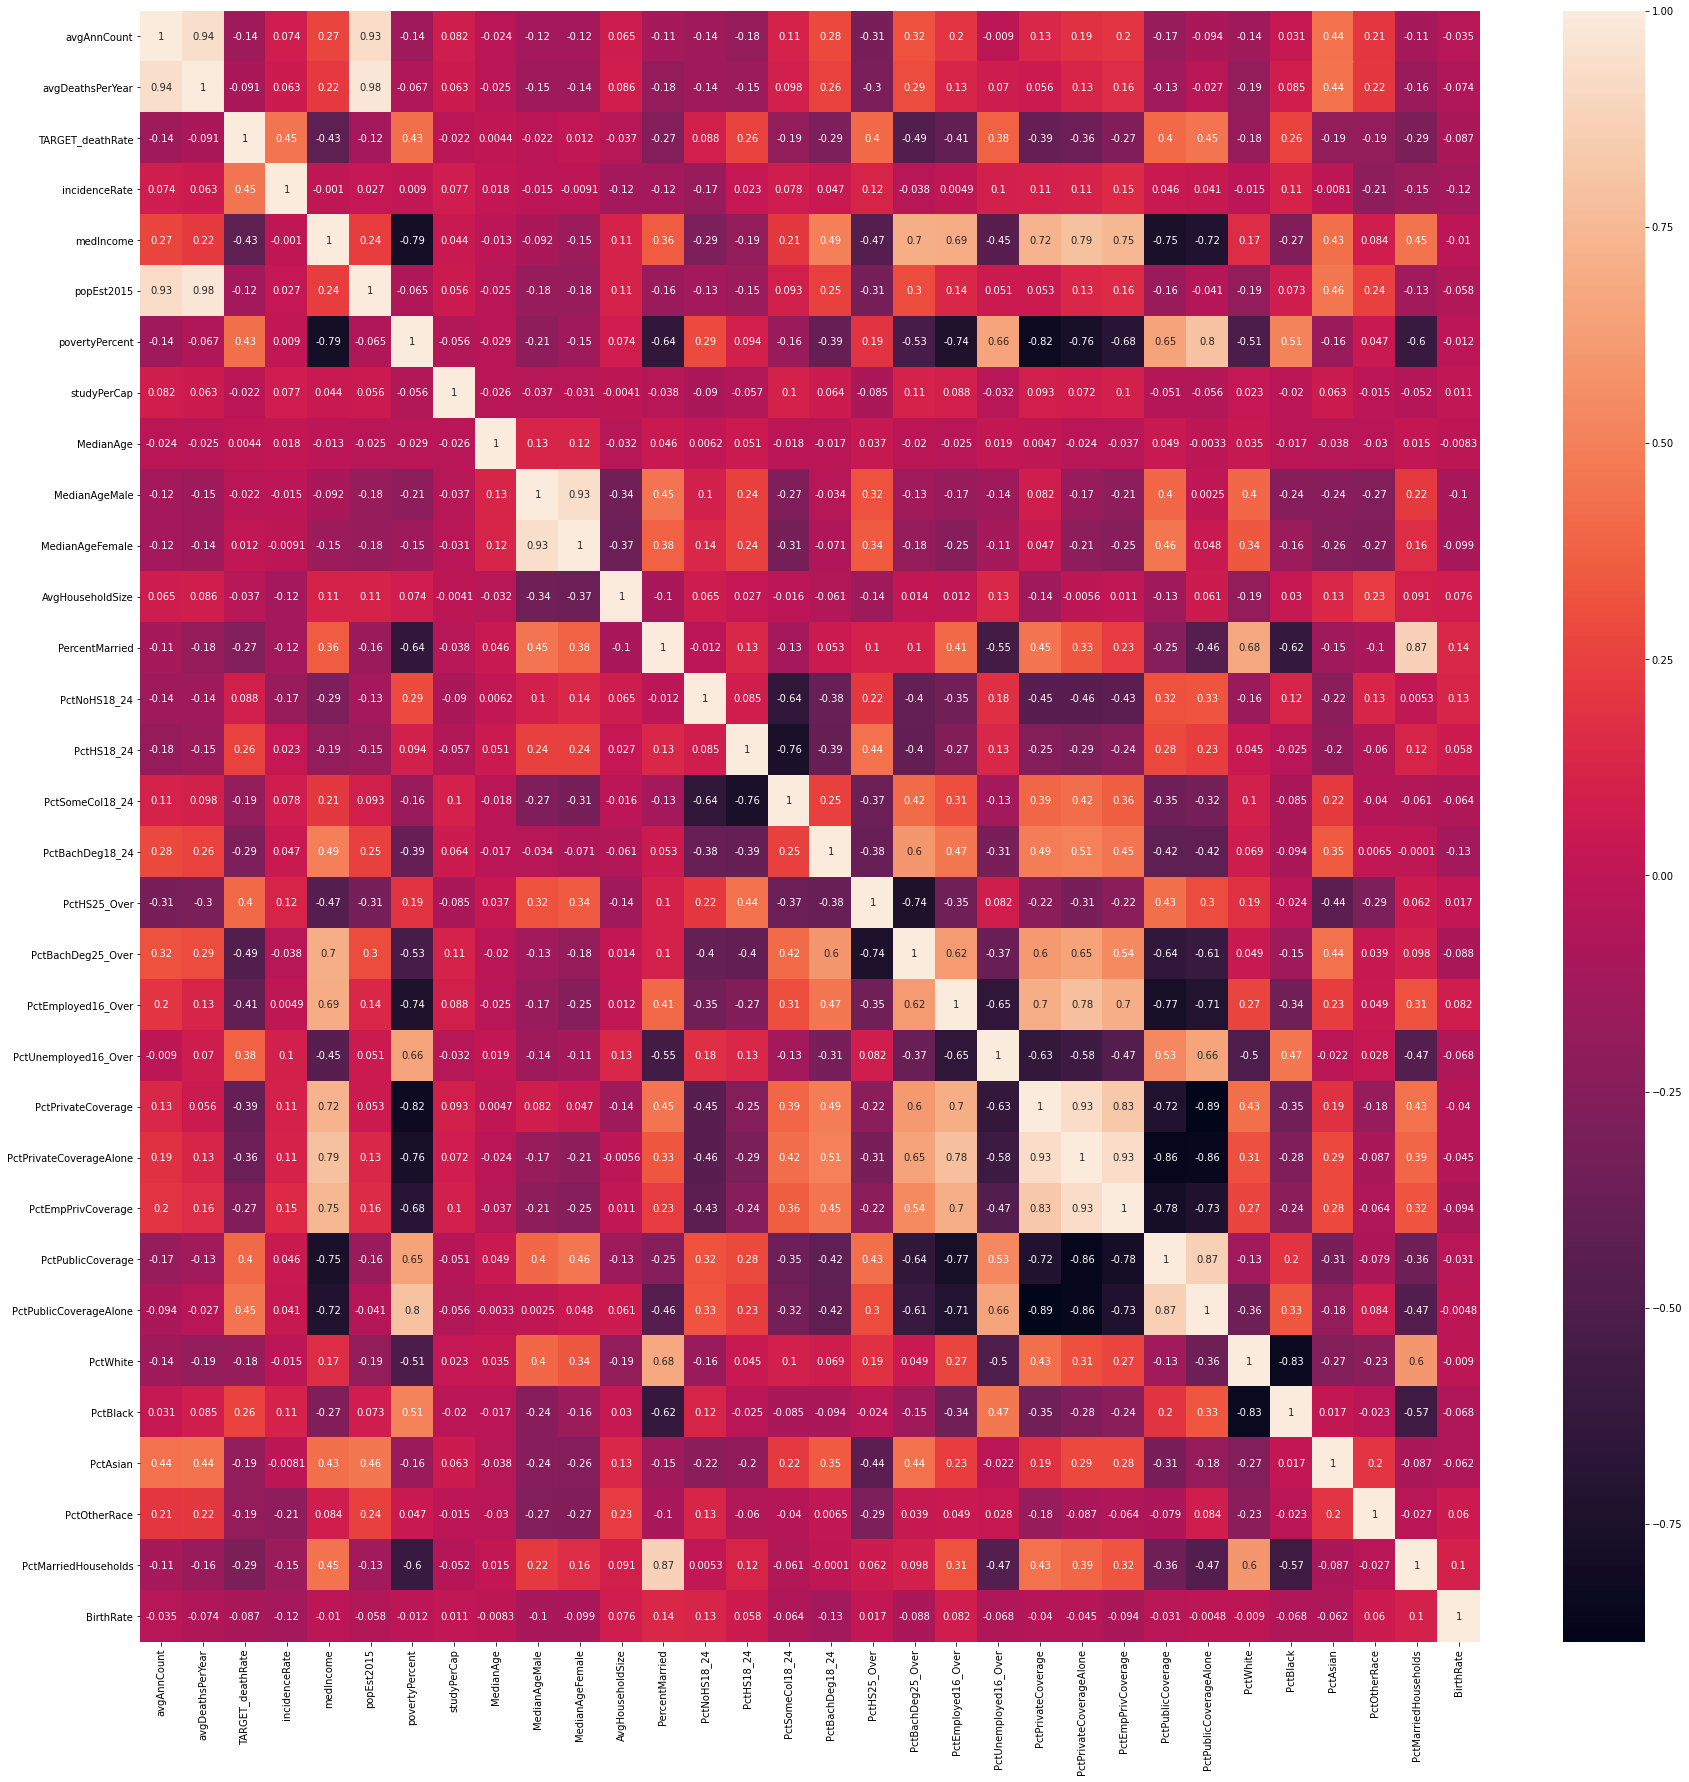

                         avgAnnCount  ...  BirthRate
avgAnnCount                 1.000000  ...  -0.034508
avgDeathsPerYear            0.939408  ...  -0.074420
TARGET_deathRate           -0.143532  ...  -0.087407
incidenceRate               0.073553  ...  -0.118181
medIncome                   0.269145  ...  -0.010195
popEst2015                  0.926894  ...  -0.057740
povertyPercent             -0.135694  ...  -0.012283
studyPerCap                 0.082071  ...   0.010676
MedianAge                  -0.024098  ...  -0.008276
MedianAgeMale              -0.124969  ...  -0.104105
MedianAgeFemale            -0.122844  ...  -0.098813
AvgHouseholdSize            0.064788  ...   0.075918
PercentMarried             -0.106108  ...   0.141404
PctNoHS18_24               -0.143327  ...   0.125895
PctHS18_24                 -0.182054  ...   0.058227
PctSomeCol18_24             0.109455  ...  -0.063891
PctBachDeg18_24             0.284176  ...  -0.125073
PctHS25_Over               -0.311375  ...   0.

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)#creating a heatmap to find the correlation
plt.show()
print(df.corr())

In [ ]:
df.drop(["Geography",'binnedInc'], axis = 1, inplace = True) #droping the columns which are insignificant

In [ ]:
X = df.iloc[:,4:].values
Y = df.iloc[:,2:3].values
print(X)
print(Y)
x = df.iloc[:,4:]
y = df.iloc[:,2:3]

[[6.18980000e+04 2.60131000e+05 1.12000000e+01 ... 1.84347853e+00
  5.28560759e+01 6.11883103e+00]
 [4.81270000e+04 4.32690000e+04 1.86000000e+01 ... 3.74135153e+00
  4.53725004e+01 4.33309558e+00]
 [4.93480000e+04 2.10260000e+04 1.46000000e+01 ... 2.74735831e+00
  5.44448684e+01 3.72948782e+00]
 ...
 [5.11440000e+04 3.45360000e+04 1.50000000e+01 ... 5.68070519e+00
  5.51539491e+01 7.80919168e+00]
 [5.07450000e+04 2.56090000e+04 1.33000000e+01 ... 2.13179047e+00
  5.84842319e+01 7.58293839e+00]
 [4.11930000e+04 3.70300000e+04 1.39000000e+01 ... 1.35645744e+00
  5.60402421e+01 8.98172324e+00]]
[[164.9]
 [161.3]
 [174.7]
 ...
 [153.9]
 [175. ]
 [213.6]]


##data pre-processing phase

In [ ]:
import numpy as np

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'mean')#filling the missing values with the mean values
imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])

##data splitting phase

In [ ]:
from sklearn.model_selection import train_test_split#splitting the dataset int training and testing parts
X_train , X_test , Y_train , Y_test = train_test_split(X,Y ,test_size = 0.2 , random_state = 1 )
x_train , x_test , y_train ,y_test = train_test_split(x,y ,test_size = 0.2 , random_state = 1 )

In [ ]:
print(X_train.shape)

(2437, 28)


In [ ]:
print(Y_train.shape)

(2437, 1)


##building a model

In [ ]:
from sklearn.linear_model import LinearRegression#building a regression model
lr = LinearRegression()
lr.fit(X_train,Y_train)#fitting the values into the regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##predicting values

[[176.8  175.9 ]
 [153.51 160.4 ]
 [196.46 195.8 ]
 ...
 [196.46 203.2 ]
 [196.64 212.  ]
 [174.33 161.7 ]]


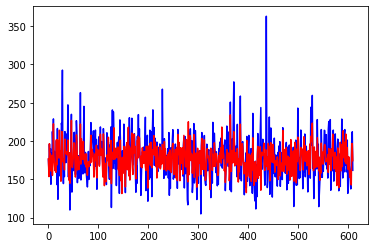

In [ ]:
y_pred = lr.predict(X_test)#pridicting the values based on X
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))#printing the values and plotting the graph
plt.plot(Y_test,color = 'blue')
plt.plot(y_pred , color = 'red')

In [ ]:
from sklearn.metrics import r2_score#finding the r^2 score
r2_score(Y_test,y_pred)

0.40664138906974645

In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

In [ ]:
lm = sm.OLS(Y_train,X_train_sm).fit()

In [ ]:
print(lm.summary())#getting the results from ols models

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     57.03
Date:                Wed, 12 Aug 2020   Prob (F-statistic):          1.28e-241
Time:                        13:10:28   Log-Likelihood:                -10916.
No. Observations:                2437   AIC:                         2.189e+04
Df Residuals:                    2408   BIC:                         2.206e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        228.0146     19.700     11.574      0.0

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, 10)             # running RFE
rfe = rfe.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
list(zip(df.columns,rfe.support_,rfe.ranking_))

[('avgAnnCount', False, 17),
 ('avgDeathsPerYear', False, 19),
 ('TARGET_deathRate', False, 12),
 ('incidenceRate', False, 18),
 ('medIncome', False, 16),
 ('popEst2015', True, 1),
 ('povertyPercent', False, 9),
 ('studyPerCap', False, 6),
 ('MedianAge', True, 1),
 ('MedianAgeMale', False, 4),
 ('MedianAgeFemale', False, 3),
 ('AvgHouseholdSize', False, 15),
 ('PercentMarried', False, 13),
 ('PctNoHS18_24', True, 1),
 ('PctHS18_24', True, 1),
 ('PctSomeCol18_24', True, 1),
 ('PctBachDeg18_24', True, 1),
 ('PctHS25_Over', False, 8),
 ('PctBachDeg25_Over', False, 11),
 ('PctEmployed16_Over', False, 2),
 ('PctUnemployed16_Over', False, 10),
 ('PctPrivateCoverage', True, 1),
 ('PctPrivateCoverageAlone', False, 7),
 ('PctEmpPrivCoverage', False, 14),
 ('PctPublicCoverage', False, 5),
 ('PctPublicCoverageAlone', True, 1),
 ('PctWhite', True, 1),
 ('PctBlack', True, 1)]

In [ ]:
x_train.columns[rfe.support_]

Index(['MedianAgeMale', 'PercentMarried', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPublicCoverageAlone',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [ ]:
x_train.columns[~rfe.support_]

Index(['medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctWhite', 'PctBlack', 'PctAsian'],
      dtype='object')

In [ ]:
 x_train.drop(['medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctWhite', 'PctBlack', 'PctAsian'],axis = 1 ,inplace = True)
 x_test.drop(['medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctWhite', 'PctBlack', 'PctAsian'],axis = 1 ,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
x_train = x_train.fillna(x_train.mean())#filling the misiing values with the mean values
x_test = x_test.fillna(x_test.mean())
lr.fit(x_train,y_train)#fitting the linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
pred = lr.predict(x_test)#r^2 value of model by RFE method
r2_score(y_test,pred) #r^2 model with RFE model gives simillar result

0.40535012701188733

Text(0, 0.5, 'ypred')

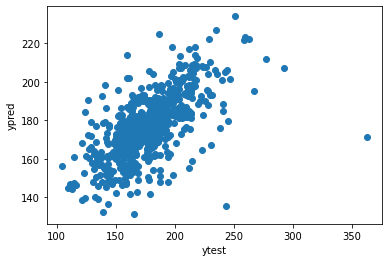

In [ ]:
plt.scatter(Y_test,y_pred)#creating a scatterplot between the predicted and tested
plt.xlabel('ytest')
plt.ylabel('ypred')